In [369]:
import pandas as pd
import numpy as np

bots=pd.read_csv('bots_data.csv', encoding='latin-1')
nonbots=pd.read_csv('nonbots_data.csv', encoding='latin-1')
bots.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name,bot
0,3.982732e+09,3982731976,mcgucket_bot,NaN,A bot that tweets every line said by Fiddlefor...,NaN,1129,7,2,Sat Oct 17 22:35:31 +0000 2015,0,False,23557,en,"{'retweeted': False, 'is_quote_status': False,...",False,False,False,McGucket bot,1
1,8.410000e+17,8.41E+17,BowieK66,NaN,NaN,NaN,0,22,0,13/03/2017 22:21,0,False,1,en,Status(_api=<tweepy.api.API object at 0x101927...,True,True,False,MJ Kuhn,1
2,2.768375e+09,2768374981,ducknoteprice,NaN,NaN,NaN,3,0,3,Mon Aug 25 23:17:59 +0000 2014,0,False,1050,en,{'created_at': 'Fri Feb 26 17:01:15 +0000 2016...,True,False,False,duckNote,1
3,3.304189e+09,3304189373,robotrecipes,robot kitchen,tasty recipes for robot // not for human // a ...,http://t.co/PdagJGqVMR,505,13,49,Sat May 30 23:42:16 +0000 2015,0,False,5109,en,"{u'contributors': None, u'truncated': False, u...",False,False,False,robot recipes,1
4,3.224289e+09,3224289024,everyumlaut,NaN,bot by @dbaker_h,NaN,15,0,11,Sat May 23 14:39:21 +0000 2015,0,False,31365,en-gb,"{u'contributors': None, u'truncated': False, u...",True,False,False,ÌÇvÌÇrÌÀ Ì_mlÌ_Ì_¼Ñ,1


load two files, 'bots_data.csv' contains the data for robots, 'nonbots_data.csv' contains the data for nonbots. Display the first 5 row of 'bots_data.csv'.

In [370]:
bots_attributes=bots[bots.columns.tolist()[:-1]]
bots_label=bots[bots.columns.tolist()[-1:]]
nonbots_attributes=nonbots[nonbots.columns.tolist()[:-1]]
nonbots_label=nonbots[nonbots.columns.tolist()[-1:]]

Bots_attributes contains all the attributes except the last one for bots_data.csv; bots_label contains the information whether it is a robot or not. 

In [371]:
m=pd.concat([bots_attributes,nonbots_attributes])
n=pd.concat([bots_label,nonbots_label])

Concatenate the two list of attributes into one list as well as the list of label. 

In [372]:
from sklearn.cross_validation import train_test_split
m_train,m_test,n_train,n_test=train_test_split(m,n,test_size = 0.2,random_state=2)
m_train=m_train.fillna(value=0)
m_test=m_test.fillna(value=0)

split the whole dataset into two parts, for one part, we will use it to train the machine, and for the other part, we will use it to cross validate our experiment. Replace all NaN as 0.

In [373]:
for i in m_train.index:
    m_train.set_value(i,'id',1)
    m_train.set_value(i,'id_str',1)

for i in m_test.index:
    m_test.set_value(i,'id',1)
    m_test.set_value(i,'id_str',1)

for attribute 'id' and 'id_str', we will convert them into ‘1’ in order to not affect our result.

In [374]:
def convert(df):
    cou=df.columns.tolist()
    counts_list= [cou[6]]
    for col in counts_list:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>16:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    for col in [cou[7]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>35:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    for col in [cou[8]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>300:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist

    for col in [cou[10]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>15:
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist

    for col in [cou[12]]:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            if alist[i]>2 and alist[i]<67000 :
                alist[i]=1
            else: alist[i]=0
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
    import string
    counts_list= ['created_at']
    for col in counts_list:
        alist=[]
        for i in df[col]:
            alist.append(i)
        for i in range(len(alist)):
            words=str(alist[i])
            for c in string.punctuation:
                words=words.replace(c, ' ')
            words=words.split()
            for w in words:
                if ('20' in w) and len(w)==4:

                    alist[i]=int(w)-2000
        selist=pd.Series(alist,index=df.index)
        df[col]=selist        
        
        
    robot_list=['screen_name','description','status','name']
    
    
           
    for col in robot_list:
        alist=[]
        for i in df[col]:
            try:
                alist.append(i.lower())
            except:
                alist.append(i)
        for i in range(len(alist)):
            try:
                if 'bot' in alist[i]:
                    alist[i]=1
                else: alist[i]=0
            except:True
        selist=pd.Series(alist,index=df.index)
        df[col]=selist
        
        
convert(m_train)
convert(m_test)


m_train.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
672,1.0,1,0,"New York, NY, USA",0,https://t.co/ZfQQjHOJN6,1,1,1,8,1,True,1,en,0,False,False,False,0
844,1.0,1,0,0,0,http://t.co/o7ZsdrXzLj,1,0,0,14,0,False,1,en,0,False,False,False,0
15,1.0,1,0,"London, England",0,0,0,1,0,17,0,False,0,en,0,True,False,False,0
209,1.0,1,0,Request queue: CLOSED,0,https://t.co/CZlLvPOcUt,1,0,0,14,0,False,1,en,0,True,False,False,0
111,1.0,1,0,London,0,https://t.co/5Vf55N5xFe,1,1,1,10,0,True,1,en,0,False,False,False,0


By observing the dataset, we find a better way to deal with the dataset. For example, the attribute 'followers_count', we can find that when the number of accounts is less than 16, the possibility of the account is bot is much larger than the accounts which have more than 16 followers. So we define the the value that less than or equal to 16 as ‘0’, the value more than 16 as ‘1’. Also, we deal with the attribute 'created_at' as year-2000 because it's likely that the account is a bot if it is created before 2000. Moreover, for attribute like 'screen_name' and 'description', it's more likely to be a robot if there is a 'bot' in it.

In [389]:
m_train=m_train.apply(pd.to_numeric,errors='coerce')
m_test=m_test.apply(pd.to_numeric,errors='coerce')

In [376]:
m_train=m_train.fillna(value=1)
m_test=m_test.fillna(value=1)
m_train.head(5)

,id,id_str,screen_name,location,description,url,followers_count,friends_count,listedcount,created_at,favourites_count,verified,statuses_count,lang,status,default_profile,default_profile_image,has_extended_profile,name
672,1.0,1,0,1.0,0,1.0,1,1,1,8,1,True,1,1.0,0,False,False,0,0
844,1.0,1,0,0.0,0,1.0,1,0,0,14,0,False,1,1.0,0,False,False,0,0
15,1.0,1,0,1.0,0,0.0,0,1,0,17,0,False,0,1.0,0,True,False,0,0
209,1.0,1,0,1.0,0,1.0,1,0,0,14,0,False,1,1.0,0,True,False,0,0
111,1.0,1,0,1.0,0,1.0,1,1,1,10,0,True,1,1.0,0,False,False,0,0


In [377]:
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
clfBN=BernoulliNB()
clfDT=tree.DecisionTreeClassifier()
clfGB=GradientBoostingClassifier() 
clfRF=RandomForestClassifier()
clfLR=LogisticRegression()
clfBN=clfBN.fit(m_train,n_train)
clfDT=clfDT.fit(m_train,n_train)
clfGB=clfGB.fit(m_train,n_train)
clfRF=clfRF.fit(m_train,n_train)
clfLR=clfLR.fit(m_train,n_train)

/Users/Sandy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/Sandy/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':
/Users/Sandy/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [379]:
from sklearn import metrics
class predictScore():
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    predicted=None
    name=''
    fpr=0
    tpr=0
    threshold=0
    cm=0
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str
        
predict_score_BN=predictScore(clfBN,'BernoulliNB')
predict_score_DT=predictScore(clfDT,'Decision Tree')     
predict_score_GB=predictScore(clfGB,'Gradient Boosting Decision Tree') 
predict_score_RF=predictScore(clfRF,'Random Forest')
predict_score_LR=predictScore(clfLR,'Logistic Regression')
predicted_scores=[predict_score_BN,predict_score_DT,predict_score_GB,predict_score_RF,predict_score_LR]

for i in predicted_scores:
    predicted=i.clf.predict(m_train)
    i.accuracy=metrics.accuracy_score(predicted,n_train['bot'])
    i.precision=metrics.precision_score(predicted,n_train['bot'])
    i.recall=metrics.recall_score(predicted,n_train['bot'])
    i.f1=metrics.f1_score(predicted,n_train['bot'])   
    i.auc=metrics.roc_auc_score(predicted,n_train['bot'])
    i.fpr,i.tpr,i.threshold=metrics.roc_curve(predicted,n_train['bot'])
    i.cm=metrics.confusion_matrix(predicted,n_train['bot'])


 BernoulliNB
Accuracy  = 0.852661064426
Precision = 0.878077373974
Recall    = 0.824889867841
F1        = 0.850653038047
Auc score = 0.853151889451
ROC curve of BernoulliNB:



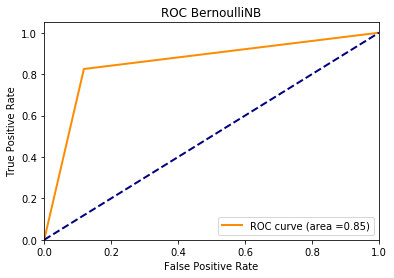

Confusion matrix, without normalization
[[773 104]
 [159 749]]


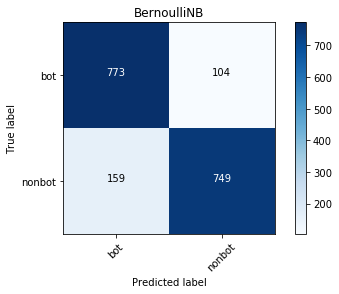


 Decision Tree
Accuracy  = 0.95406162465
Precision = 0.921453692849
Recall    = 0.98127340824
F1        = 0.950423216445
Auc score = 0.956591988673
ROC curve of Decision Tree:



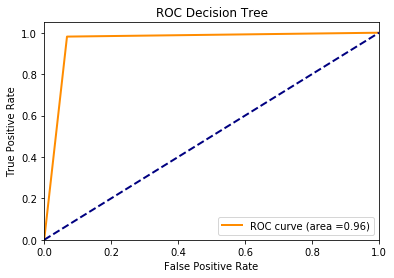

Confusion matrix, without normalization
[[917  67]
 [ 15 786]]


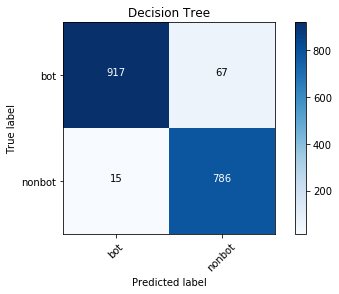


 Gradient Boosting Decision Tree
Accuracy  = 0.905322128852
Precision = 0.915592028136
Recall    = 0.889521640091
F1        = 0.902368573079
Auc score = 0.905069530079
ROC curve of Gradient Boosting Decision Tree:



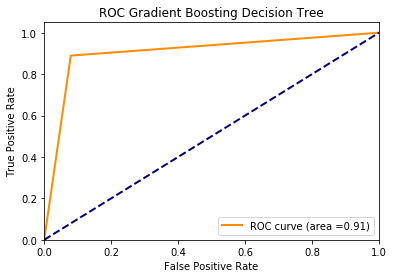

Confusion matrix, without normalization
[[835  72]
 [ 97 781]]


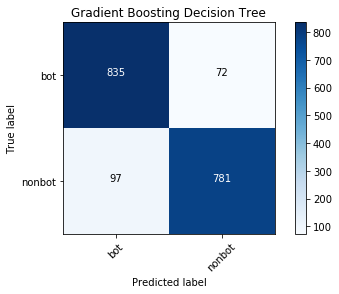


 Random Forest
Accuracy  = 0.951260504202
Precision = 0.941383352872
Recall    = 0.955952380952
F1        = 0.948611931483
Auc score = 0.951521164021
ROC curve of Random Forest:



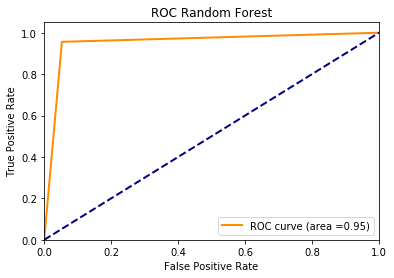

Confusion matrix, without normalization
[[895  50]
 [ 37 803]]


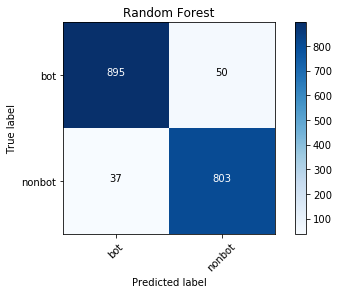


 Logistic Regression
Accuracy  = 0.889635854342
Precision = 0.900351699883
Recall    = 0.872727272727
F1        = 0.886324293133
Auc score = 0.889402310397
ROC curve of Logistic Regression:



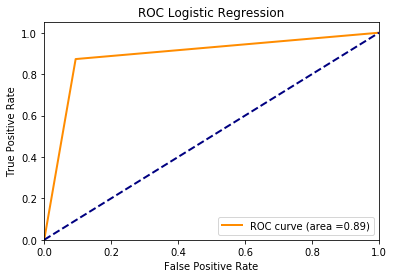

Confusion matrix, without normalization
[[820  85]
 [112 768]]


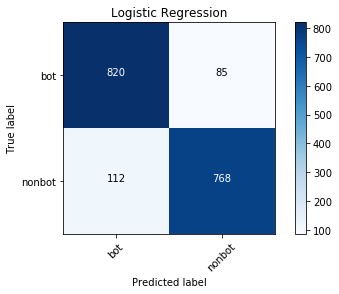

In [380]:
for i in predicted_scores:
    print ('\n',i.name)
    print ('Accuracy  =',i.accuracy)
    print ('Precision =',i.precision)
    print ('Recall    =',i.recall)
    print ('F1        =',i.f1)
    print ('Auc score =',i.auc)
    print ('ROC curve of '+i.name+':\n')
    plt.figure()
    lw = 2
    plt.plot(i.fpr, i.tpr, color='darkorange',lw=lw, label='ROC curve (area =%.2f)'% i.auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC %s'%i.name)
    plt.legend(loc="lower right")
    plt.show()
    
    import itertools
    plt.figure()
    cm = i.cm
    cmap=plt.cm.Blues
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(i.name)
    plt.colorbar()
    tick_marks = np.arange(2)
    plt.xticks(tick_marks, ['bot','nonbot'], rotation=45)
    plt.yticks(tick_marks, ['bot','nonbot'])

    print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [381]:
class CrossValueScore:
    accuracy=0
    precision=0
    recall=0
    f1=0
    auc=0
    clf=None
    name=''
    def __init__(self,classifier,name_str):
        self.clf = classifier
        self.name=name_str
cross_score_BN=CrossValueScore(clfBN,'BernoulliNB')
cross_score_DT=CrossValueScore(clfDT,'Decision Tree')
cross_score_GB=CrossValueScore(clfGB,'Gradient Boosting Decision Tree')
cross_score_RF=CrossValueScore(clfRF,'Random Forest')
cross_score_LR=CrossValueScore(clfLR,'Logistic Regression')

scores=[cross_score_BN,cross_score_DT,cross_score_GB,cross_score_RF,cross_score_LR]

for i in scores:
    i.accuracy=cross_val_score(i.clf,m_test,n_test['bot'],scoring='accuracy',cv=10)
    i.precision=cross_val_score(i.clf,m_test,n_test['bot'],scoring='precision',cv=10)
    i.recall=cross_val_score(i.clf,m_test,n_test['bot'],scoring='recall',cv=10)
    i.f1=cross_val_score(i.clf,m_test,n_test['bot'],scoring='f1',cv=10)
    i.auc=cross_val_score(i.clf,m_test,n_test['bot'],scoring='roc_auc',cv=10)

In [382]:
for i in scores:
    print ('\n',i.name)
    print ('Accuracy  =',i.accuracy)
    print ('Precision =',i.precision)
    print ('Recall    =',i.recall)
    print ('F1        =',i.f1)
    print ('Auc score =',i.auc)


 BernoulliNB
Accuracy  = [ 0.91304348  0.86956522  0.91304348  0.88888889  0.86363636  0.77272727
  0.86363636  0.90909091  0.81818182  0.65909091]
Precision = [ 0.9047619   0.89473684  0.86956522  0.82608696  0.85        0.72727273
  0.85        0.9         0.77272727  0.63157895]
Recall    = [ 0.9047619   0.80952381  0.95238095  0.95        0.85        0.8         0.85
  0.9         0.85        0.6       ]
F1        = [ 0.9047619   0.85        0.90909091  0.88372093  0.85        0.76190476
  0.85        0.9         0.80952381  0.61538462]
Auc score = [ 0.94952381  0.93142857  0.94285714  0.964       0.90625     0.81145833
  0.94166667  0.92708333  0.92291667  0.81770833]

 Decision Tree
Accuracy  = [ 0.86956522  0.89130435  0.89130435  0.86666667  0.81818182  0.81818182
  0.88636364  0.79545455  0.86363636  0.75      ]
Precision = [ 0.94736842  0.94736842  0.94444444  0.79166667  0.83333333  0.92857143
  0.89473684  0.69565217  0.85714286  0.77777778]
Recall    = [ 0.80952381  0.857

In [383]:
a=np.mean(cross_score_BN.accuracy)
b=np.mean(cross_score_BN.precision)
c=np.mean(cross_score_BN.recall)
d=np.mean(cross_score_BN.f1)
e=np.mean(cross_score_BN.auc)
   
print ('BNaccuracy  =',a)
print ('BNPrecision =',b)
print ('BNRecall    =',c)
print ('BNF1        =',d)
print ('BNAuc score =',e)

BNaccuracy  = 0.847090469917
BNPrecision = 0.822672986815
BNRecall    = 0.846666666667
BNF1        = 0.83343869309
BNAuc score = 0.911489285714


In [384]:
a=np.mean(cross_score_DT.accuracy)
b=np.mean(cross_score_DT.precision)
c=np.mean(cross_score_DT.recall)
d=np.mean(cross_score_DT.f1)
e=np.mean(cross_score_DT.auc)


print ('DTaccuracy  =',a)
print ('DTPrecision =',b)
print ('DTRecall    =',c)
print ('DTF1        =',d)
print ('DTAuc score =',e)

DTaccuracy  = 0.845065876153
DTPrecision = 0.861806236606
DTRecall    = 0.812619047619
DTF1        = 0.82866793015
DTAuc score = 0.86485952381


In [385]:
a=np.mean(cross_score_GB.accuracy)
b=np.mean(cross_score_GB.precision)
c=np.mean(cross_score_GB.recall)
d=np.mean(cross_score_GB.f1)
e=np.mean(cross_score_GB.auc)


print ('GBDTaccuracy  =',a)
print ('GBDTPrecision =',b)
print ('GBDTRecall    =',c)
print ('GBDTF1        =',d)
print ('GBDTAuc score =',e)

GBDTaccuracy  = 0.863098375055
GBDTPrecision = 0.843190362269
GBDTRecall    = 0.857380952381
GBDTF1        = 0.852303172509
GBDTAuc score = 0.952948809524


In [386]:
a=np.mean(cross_score_RF.accuracy)
b=np.mean(cross_score_RF.precision)
c=np.mean(cross_score_RF.recall)
d=np.mean(cross_score_RF.f1)
e=np.mean(cross_score_RF.auc)


print ('RFaccuracy  =',a)
print ('RFPrecision =',b)
print ('RFRecall    =',c)
print ('RFF1        =',d)
print ('RFAuc score =',e)

RFaccuracy  = 0.867841458059
RFPrecision = 0.84739420521
RFRecall    = 0.832619047619
RFF1        = 0.848399443866
RFAuc score = 0.945501190476


In [387]:
a=np.mean(cross_score_LR.accuracy)
b=np.mean(cross_score_LR.precision)
c=np.mean(cross_score_LR.recall)
d=np.mean(cross_score_LR.f1)
e=np.mean(cross_score_LR.auc)


print ('LRaccuracy  =',a)
print ('LRPrecision =',b)
print ('LRRecall    =',c)
print ('LRF1        =',d)
print ('LRAuc score =',e)

LRaccuracy  = 0.840421607378
LRPrecision = 0.808677934956
LRRecall    = 0.856904761905
LRF1        = 0.830101437606
LRAuc score = 0.937389285714
